# LIBRARIES IMPORT

In [2]:
# imports

from fig_lib import *
import CNN_lib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# DATA GENERATOR

In [3]:
# -------- DATA PARAMS --------

generate_new_data=True
    
n_recs_train,n_recs_eval=5000,500
height, width = 100, 100
circles_filled=False
color=255


In [4]:
#input_d, eval_d

if generate_new_data:

    input_d=im_data_gen(height, width,n_recs_train,'I',cir_f=circles_filled,color=color)
    eval_d=im_data_gen(height, width,n_recs_eval,'I',cir_f=circles_filled,color=color)

In [5]:
print('RECORD - LABEL - SHAPE')

if generate_new_data:
    
    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE
I0 circle (100, 100) <class 'numpy.ndarray'>
I1 line (100, 100) <class 'numpy.ndarray'>
I2 circle (100, 100) <class 'numpy.ndarray'>
I3 line (100, 100) <class 'numpy.ndarray'>
I4 circle (100, 100) <class 'numpy.ndarray'>
I5 circle (100, 100) <class 'numpy.ndarray'>
I6 circle (100, 100) <class 'numpy.ndarray'>
I7 circle (100, 100) <class 'numpy.ndarray'>
I8 line (100, 100) <class 'numpy.ndarray'>
I9 circle (100, 100) <class 'numpy.ndarray'>
I10 line (100, 100) <class 'numpy.ndarray'>
I11 circle (100, 100) <class 'numpy.ndarray'>
I12 circle (100, 100) <class 'numpy.ndarray'>
I13 line (100, 100) <class 'numpy.ndarray'>
I14 circle (100, 100) <class 'numpy.ndarray'>
I15 circle (100, 100) <class 'numpy.ndarray'>
I16 line (100, 100) <class 'numpy.ndarray'>
I17 line (100, 100) <class 'numpy.ndarray'>
I18 line (100, 100) <class 'numpy.ndarray'>
I19 circle (100, 100) <class 'numpy.ndarray'>
I20 circle (100, 100) <class 'numpy.ndarray'>
I21 line (100, 100) <class 'numpy.nda

line


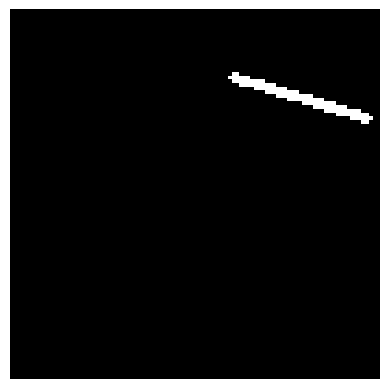

In [6]:
d_plt_check,rec_check=True,'I1'

if generate_new_data:
    
    d_plt_check,rec_check=True,'I1'
    print(input_d[rec_check]['label'])

    if d_plt_check:

        imagen = input_d[rec_check]['image']

        plt.imshow(imagen, cmap='gray')
        plt.axis('off')
        plt.show()


# CNN

In [ ]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'image_bin_I'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epch=5


### GENERATE TRAIN DATA

In [7]:
# X_train,Y_train,X_eval,Y_eval

X_train,Y_train =CNN_lib.cnn_data_bin_gen(input_d,zero='circle', one= 'line')
X_eval,Y_eval = CNN_lib.cnn_data_bin_gen(eval_d,zero='circle', one= 'line')

print('Train data:',len(Y_train),'Evaluation data:',len(Y_eval))

Train data: 5000 Evaluation data: 500


 Train data shape: (5000, 100, 100)


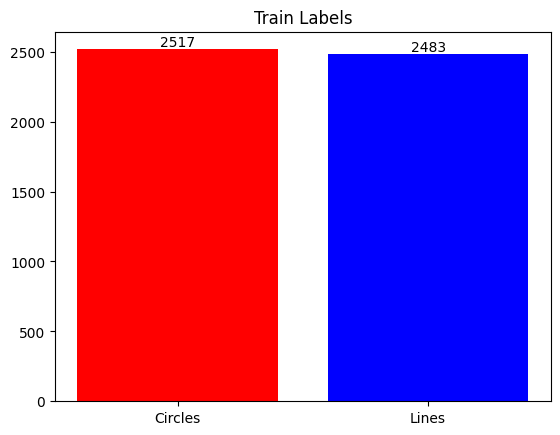

In [8]:
# check data

zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)

labels = ['Circles', 'Lines']
print(' Train data shape:', np.shape(X_train))

plt.bar(labels, [zeros_count, ones_count], color=['red', 'blue'])

for i, count in enumerate([zeros_count, ones_count]):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Train Labels')
plt.show()

### GENERATE MODEL

In [15]:
# MODEL 

if model_from_CNN_lib:
  
  model=CNN_lib.lib_models(mdl,im_input_shp=(height, width))

else:
  
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(height, width)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1280128   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1280257 (4.88 MB)
Trainable params: 1280257 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs=epch)

Epoch 1/5
157/157 [==============================] - 2s 11ms/step - loss: 4.5983 - accuracy: 0.8312
Epoch 2/5
157/157 [==============================] - 2s 11ms/step - loss: 0.1806 - accuracy: 0.9704
Epoch 3/5
157/157 [==============================] - 2s 11ms/step - loss: 0.0779 - accuracy: 0.9842
Epoch 4/5
157/157 [==============================] - 2s 11ms/step - loss: 0.0349 - accuracy: 0.9930
Epoch 5/5
157/157 [==============================] - 2s 11ms/step - loss: 0.0248 - accuracy: 0.9950


In [12]:
loss, accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

16/16 - 0s - loss: 0.4485 - accuracy: 0.9440 - 147ms/epoch - 9ms/step
Loss: 0.4485093057155609
Accuracy: 0.9440000057220459


### FORECAST

GENERATE RANDOM IMAGE

In [13]:
# generate random im

n_rdm=np.random.rand()

if n_rdm>=0.5:image,label=line_im(height=height, width=width,thickness=(1,3),color=color)
else:image,label=circle_im(height=height, width=width,thickness=(1,3),color=color,filled=circles_filled)


1/1 - 0s - 66ms/epoch - 66ms/step
Real: line ----> Forecast: 100.0 % line
 


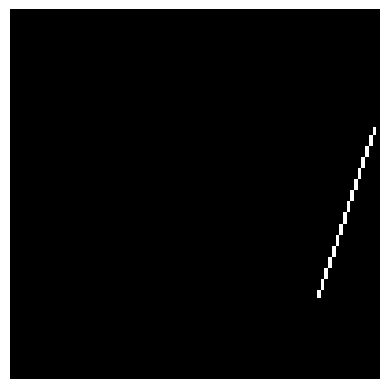

In [14]:
# Forecast

pred = model.predict(np.expand_dims(image, axis=0),verbose=2)
CNN_lib.bin_forecast(pred,label=label,up_frc='line',down_frc='circle')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
